# Diffeomorphic Temporal Alignment Nets (DTAN) Usage Examples

## On the importance of the smoothness prior ($F_{reg}$)
An example of time-series joint alignment via DTAN with and without the smoothness prior. <br>
Applying the prior serves as a regularization term, constraining the magnitude of the transformation and 
encourging smooth velocity fields (the correlation between them).

# Setup

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
import argparse
import torch
import pandas as pd
import numpy as np

# import random
# random.seed(5)
# np.random.seed(5)
# torch.manual_seed(5)
# torch.cuda.manual_seed(5)
# torch.cuda.manual_seed_all(5)
# torch.backends.cudnn.benchmark = False
# torch.backends.cudnn.deterministic = True

if module_path not in sys.path:
    sys.path.append(module_path)

# From helper
from helper.plotting_torch import plot_signals
from helper.UCR_loader import get_UCR_data, get_data

# from models
from models.train_utils import ExperimentsManager, DTAN_args
from models.train_model import train, test

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [2]:
%load_ext line_profiler

In [3]:
# Jupyter args
# load changes from imports every 2 seconds
%load_ext autoreload
%autoreload 2

# Matplotlib
%matplotlib inline


In [4]:
# # m = np.ones((1, 1))
# m=1
# x = np.linspace(m*0, m*2*np.pi, 10)
# x =np.tile(x,2)
# data = np.sin(x)
# plt.plot(data)
# np.savetxt('/home/abilasha/Downloads/mts_ad/dtan-master/examples/data/sample.csv', data, delimiter=',')

## Declare variables


In [5]:

# Data
datadir = "../data/"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset_name = "artificial"
# dataset_name="ecg"
# dataset_name = "ECGFiveDays"
# Plotting flag
plot_signals_flag = True

# Experiments, this names will serve as the checkpoints name
exp_1 = dataset_name + "with_prior"
exp_2 = "_without_prior"

exps_names = [exp_1, exp_2] 

## Create experiments class

In [6]:
"""
We use the ExperimentsManager to store the two experiments we are about to run
The DTAN_args() is used to store variables related to DTAN
    and not general training ones such as "learining_rate" or "epochs"
    
You can custimize the trainning shemce, network architecture and more in the scripts themself.

"""

# Init an instance of the experiment class. Holds results
# and trainning param such as lr, n_epochs etc
expManager = ExperimentsManager()
# Create 2 experiments class
expManager.add_experiment(exp_1, n_epochs=50, batch_size=32, lr=0.001, device=device)
expManager.add_experiment(exp_2, n_epochs=50, batch_size=64, lr=0.001, device=device)

# Arguments for DTAN class
# DTAN args with smoothness prior
DTANargs1 = DTAN_args(tess_size=32,
                      smoothness_prior=True,
                      lambda_smooth=1,
                      lambda_var=0.1,
                      n_recurrences=1,
                      zero_boundary=True,
                      )

# DTAN args tess 4
DTANargs2 = DTAN_args(tess_size=32,
                      smoothness_prior=False,
                      n_recurrences=1,
                      zero_boundary=True,
                      )

# add args to the experiments manager
expManager[exp_1].add_DTAN_arg(DTANargs1)
expManager[exp_2].add_DTAN_arg(DTANargs2)


# Train models

In [7]:
datadir = "../examples/data/"
print(exps_names)
# for exp in exps_names:

exp=exp_1
print(exp)
# get current experiment
Experiment = expManager[exp]
DTANargs = Experiment.get_DTAN_args()
# get data loaders
#     train_loader, validation_loader, test_loader = get_UCR_data(dataset_name,
#                                                                 datadir,
#                                                                 batch_size=Experiment.batch_size)



train_dataloader_full, train_loader, validation_loader, train_dataloader_full_non, test_dataloader_non, X_test = get_data(dataset_name, datadir, batch_size=Experiment.batch_size)
# Train model


model = train(train_loader, validation_loader, DTANargs, Experiment, print_model=True)



Experiment.add_DTAN_model(model)


['artificialwith_prior', '_without_prior']
artificialwith_prior


  0%|          | 0/50 [00:00<?, ?it/s]

DTAN(
  (localization): Sequential(
    (0): Conv1d(8, 128, kernel_size=(7,), stride=(1,))
    (1): MaxPool1d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace=True)
  )
  (fc_loc): Sequential(
    (0): Linear(in_features=1408, out_features=16, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=16, out_features=31, bias=True)
    (3): Tanh()
  )
)
{'tess_size': 32, 'zero_boundary': True, 'smoothness_prior': True, 'lambda_smooth': 1, 'lambda_var': 0.1, 'n_recurrences': 1, 'T': 
        CPAB transformer class. 
            Parameters:
                Tesselation size:           [32]
                Total number of cells:      32
                Theta size:                 31
                Domain lower bound:         [0]
                Domain upper bound:         [1]
                Zero Boundary:              True
                Volume perservation:        False
            Backend:                        pytorch
        }
# parame

/home/abilasha/anaconda3/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1656352428622/work/aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 50/50 [00:22<00:00,  2.24it/s]


Train set: Average loss: 0.0012

Validation set: Average loss: 0.0036



# With smoothness prior

(360, 8, 30)
(600, 8, 30)


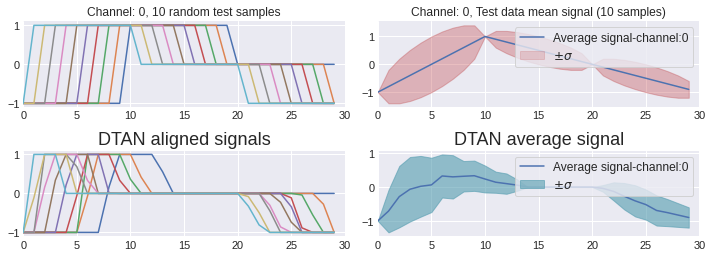

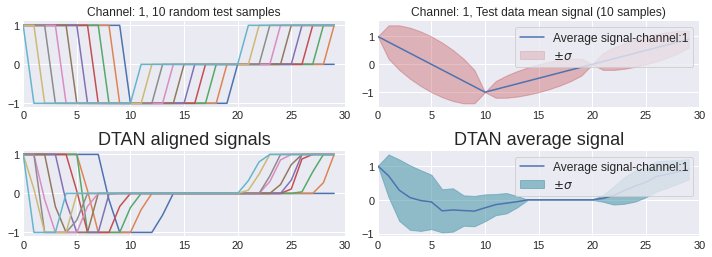

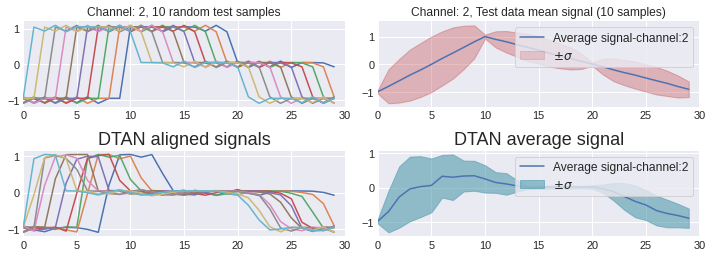

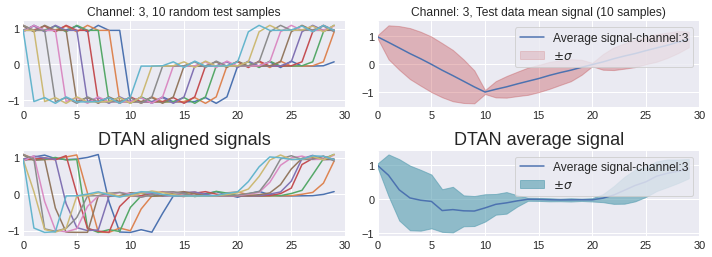

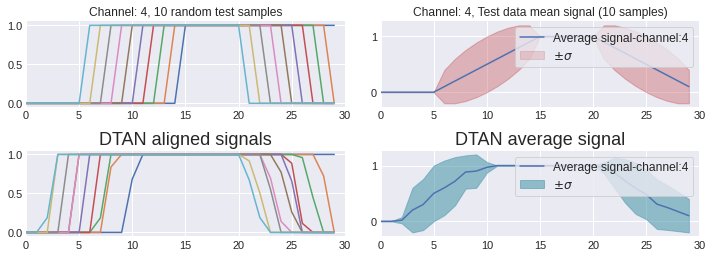

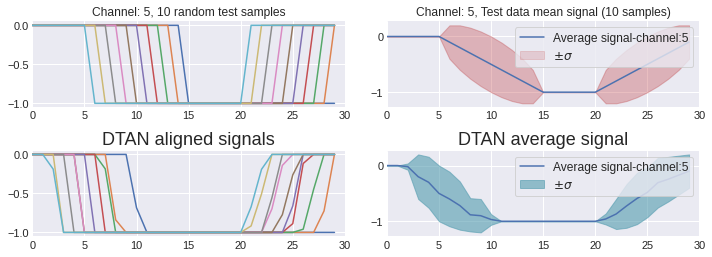

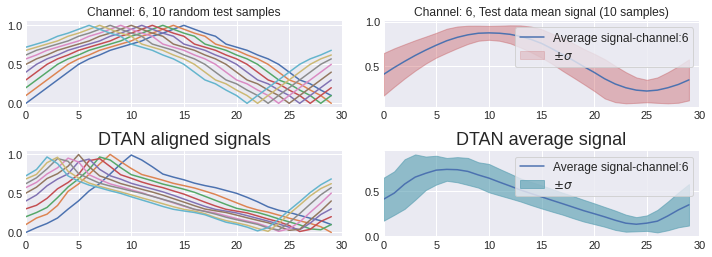

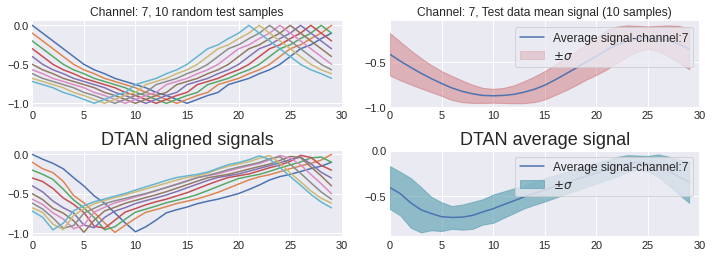

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
# Plot aligned signals
model = expManager[exp_1].get_DTAN_model()
plot_signals(model, device, datadir, dataset_name, train_dataloader_full_non, test_dataloader_non, X_test, batch_size=Experiment.batch_size)

In [10]:
# import matplotlib.pyplot as plt
# # Plot aligned signals
# model = expManager[exp_1].get_DTAN_model()
# plot_signals(model, device, datadir, dataset_name)

# Without smoothness prior
Since DTAN framework is unsupervised (in terms of alignment), <br>
the data loss term, within-class variance, could be minimized by unrealistically-large deformations. <br>
The smoothness prior help preventing that.

In [9]:
exp=exp_2
print(exp)


Experiment = expManager[exp]
DTANargs = Experiment.get_DTAN_args()
# get data loaders
#     train_loader, validation_loader, test_loader = get_UCR_data(dataset_name,
#                                                                 datadir,
#                                                                 batch_size=Experiment.batch_size)



train_dataloader_full, train_loader, validation_loader, train_dataloader_full_non, test_dataloader_non, X_test = get_data(dataset_name, datadir, batch_size=Experiment.batch_size)
# Train model


model = train(train_loader, validation_loader, DTANargs, Experiment, print_model=True)



Experiment.add_DTAN_model(model)

  4%|▍         | 2/50 [00:00<00:02, 18.05it/s]

_without_prior
DTAN(
  (localization): Sequential(
    (0): Conv1d(2, 128, kernel_size=(7,), stride=(1,))
    (1): MaxPool1d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace=True)
  )
  (fc_loc): Sequential(
    (0): Linear(in_features=1408, out_features=16, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=16, out_features=31, bias=True)
    (3): Tanh()
  )
)
{'tess_size': 32, 'zero_boundary': True, 'smoothness_prior': False, 'lambda_smooth': 1, 'lambda_var': 0.1, 'n_recurrences': 1, 'T': 
        CPAB transformer class. 
            Parameters:
                Tesselation size:           [32]
                Total number of cells:      32
                Theta size:                 31
                Domain lower bound:         [0]
                Domain upper bound:         [1]
                Zero Boundary:              True
                Volume perservation:        False
            Backend:                        pytorch
  

100%|██████████| 50/50 [00:02<00:00, 20.06it/s]


Train set: Average loss: 0.0375

Validation set: Average loss: 0.0390



(12, 2, 30)
(19, 2, 30)


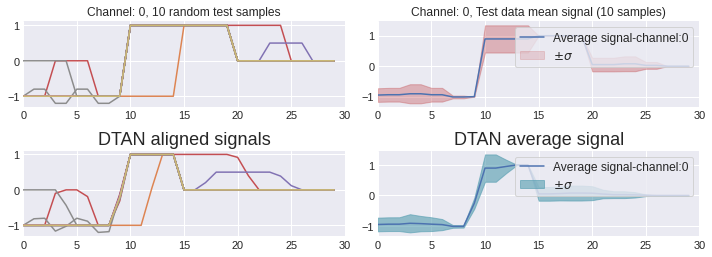

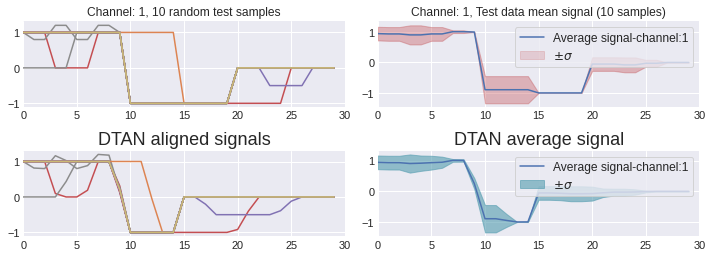

<Figure size 432x288 with 0 Axes>

In [11]:
model = expManager[exp_2].get_DTAN_model()
plot_signals(model, device, datadir, dataset_name, train_dataloader_full_non, test_dataloader_non, X_test, batch_size=Experiment.batch_size)